<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/CCPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.tree import DecisionTreeRegressor

In [0]:
#Creating a dataframe
data = pd.read_csv("data.csv")

In [14]:
#Checking the first five rows of the dataframe
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


#Exploratory Data Analysis

In [15]:
#basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [16]:
#Setting the color style for the seaborn plots
sbn.set_style('darkgrid')
sbn.despine()

<Figure size 432x288 with 0 Axes>

In [17]:
#Ambient Temperature
data['AT'].describe()

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64

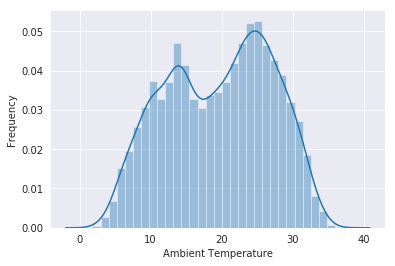

In [18]:
dist = sbn.distplot(data['AT'])
dist.set(xlabel = 'Ambient Temperature', ylabel = 'Frequency')
plt.show()

In [19]:
#Vacuum
data['V'].describe()

count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: V, dtype: float64

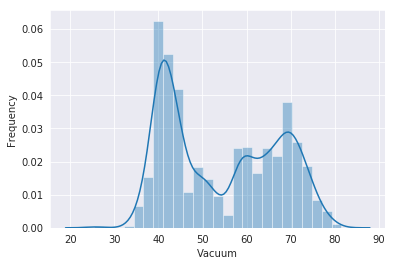

In [20]:
dist = sbn.distplot(data['V'])
dist.set(xlabel = 'Vacuum', ylabel = 'Frequency')
plt.show()

In [21]:
#Relative Humidity
data['RH'].describe()

count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: RH, dtype: float64

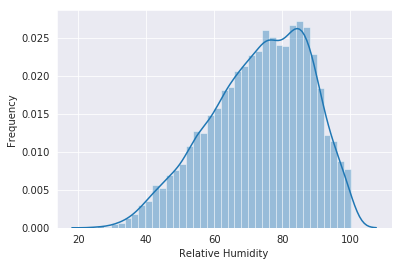

In [22]:
dist = sbn.distplot(data['RH'])
dist.set(xlabel = 'Relative Humidity', ylabel = 'Frequency')
plt.show()

In [23]:
#Ambient Pressure
data['AP'].describe()

count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: AP, dtype: float64

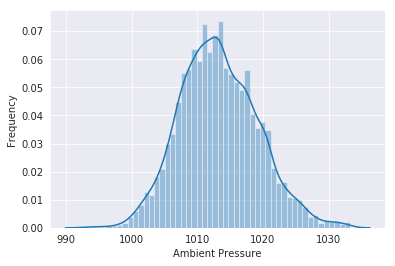

In [24]:
dist = sbn.distplot(data['AP'])
dist.set(xlabel = 'Ambient Pressure', ylabel = 'Frequency')
plt.show()

In [25]:
#Output Energy
data['PE'].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

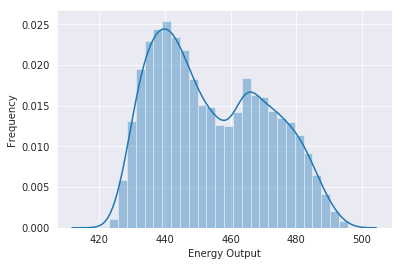

In [26]:
dist = sbn.distplot(data['PE'])
dist.set(xlabel = 'Energy Output', ylabel = 'Frequency')
plt.show()

In [27]:
data.corr()['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

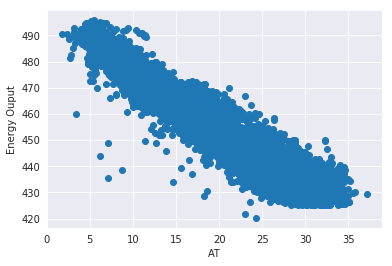

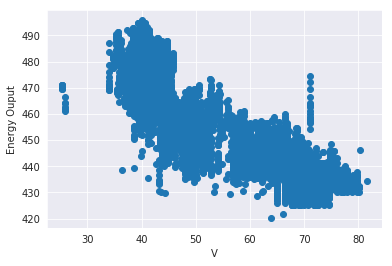

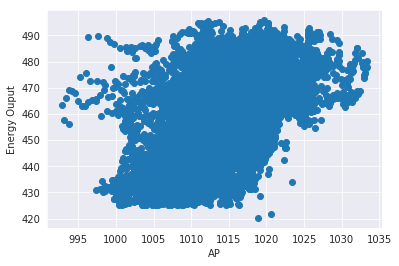

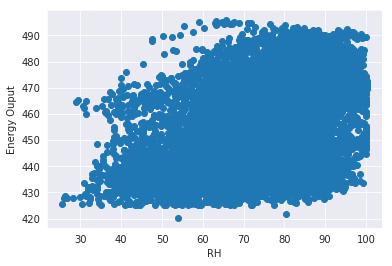

In [28]:
for col in data.columns[:len(data.columns)-1]:
    plt.scatter(data[col], data["PE"])
    plt.ylabel("Energy Ouput")
    plt.xlabel(col)
    plt.show()

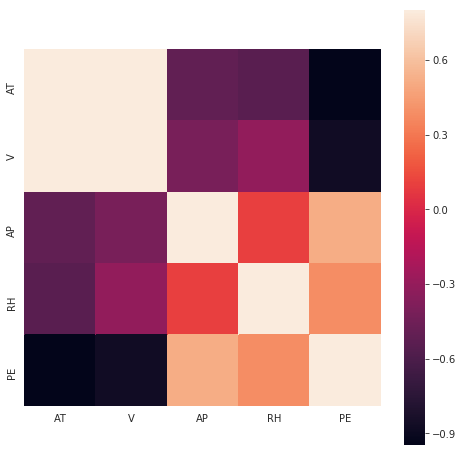

In [29]:
#Correlation Between the variables
corr = data.corr()
fig = plt.figure(figsize = (8,8))

sbn.heatmap(corr, vmax = .8, square = True)
plt.show()

#Linear Regression

##Removing One Independent Variable

###Removing Ambient Temperature

In [0]:
train = data[["V","AP","RH"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values fro
predictions = lm.predict(X_test)

In [33]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.803876116219643
Mean Absolute Error =  5.887990572235361
Mean Squared Error =  56.842747298752954
Explained Variance Score 0.8039093920202053


###Removing Vacuum

In [0]:
#Creating Training Set
train = data[['AT','RH','AP']].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [37]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.922140879357913
Mean Absolute Error =  3.7957105201799117
Mean Squared Error =  22.565973272881592
Explained Variance Score 0.9221472688047232


###Removing Relative Humidity

In [0]:
#Creating Training Set
train = data[['AT','V','AP']].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values 
predictions = lm.predict(X_test)

In [41]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9194516245247408
Mean Absolute Error =  3.8573226877582254
Mean Squared Error =  23.345402223386934
Explained Variance Score 0.9195167608769244


###Removing Ambient Pressure

In [0]:
#Creating Training Set
train = data[['AT','V','RH']].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values 
predictions = lm.predict(X_test)

In [45]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9298487586140283
Mean Absolute Error =  3.6108475569041594
Mean Squared Error =  20.331992258843854
Explained Variance Score 0.929850818587691


##Removing Two Variables

###Removing Ambient Temperature and Vacuum

In [0]:
train = data[["AP","RH"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [49]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.3738016184803177
Mean Absolute Error =  10.978987622435488
Mean Squared Error =  181.491594361219
Explained Variance Score 0.3745468133709353


###Removing Ambient Temperature and Relative Humidity

In [0]:
train = data[["V","AP"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [53]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.7875801965570406
Mean Absolute Error =  6.115759386550274
Mean Squared Error =  61.56580716034269
Explained Variance Score 0.7875907539732478


###Removing Ambient Temperature and Ambient pressure

In [0]:
train = data[["V","RH"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [57]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.7691208816609235
Mean Absolute Error =  6.445282260447684
Mean Squared Error =  66.9158856501364
Explained Variance Score 0.7691363778379259


###Removing Vacuum and Relative Humidity

In [0]:
train = data[["AT","AP"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [61]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9018044201490576
Mean Absolute Error =  4.268974173566781
Mean Squared Error =  28.460106049973508
Explained Variance Score 0.901958286229927


###Removing Vacuum and Ambient Pressure

In [0]:
train = data[["AT","RH"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values 
predictions = lm.predict(X_test)

In [65]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9220727448466683
Mean Absolute Error =  3.795770346894543
Mean Squared Error =  22.585720754577114
Explained Variance Score 0.9220786056846294


###Removing Relative humidity  and Ambient Pressure

In [0]:
train = data[["AT","V"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [69]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9169305848301882
Mean Absolute Error =  3.907646271371917
Mean Squared Error =  24.07607724126529
Explained Variance Score 0.916997504486952


##Removing Three Independent Variables

###Using Only Ambient Temperature

In [0]:
train = data[["AT"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [73]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.8999376010956851
Mean Absolute Error =  4.278001327048842
Mean Squared Error =  29.001167758817655
Explained Variance Score 0.9000932733477875


###Using Only Vacuum

In [0]:
train = data[["V"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [77]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.7542280182896011
Mean Absolute Error =  6.5769239135917275
Mean Squared Error =  71.23229654743946
Explained Variance Score 0.7542493141993352


###Using Only Relative Humidity

In [0]:
train = data[["RH"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [81]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.14850810596936315
Mean Absolute Error =  13.172904915485041
Mean Squared Error =  246.78859925864728
Explained Variance Score 0.14935505853779296


###Using Only  Ambient Pressure

In [0]:
train = data[["AP"]].copy()
#Test Set
test = data[['PE']].copy()

In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [0]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
#Predicting the test values
predictions = lm.predict(X_test)

In [85]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.25922240016857634
Mean Absolute Error =  11.98422858417856
Mean Squared Error =  214.700183884548
Explained Variance Score 0.259264271344925


##Using all Variables

In [86]:
#Creating Training Set
train = data[['AT','V','RH','AP']].copy()
train.head()

,AT,V,RH,AP
0,8.34,40.77,90.01,1010.84
1,23.64,58.49,74.20,1011.40
2,29.74,56.90,41.91,1007.15
3,19.07,49.69,76.79,1007.22
4,11.80,40.66,97.20,1017.13


In [87]:
#Test Set
test = data[['PE']].copy()
test.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [0]:
#Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)

In [89]:
#Creating a Linear regression model and fitting the train data
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting the test values from X_test
predictions = lm.predict(X_test)

In [91]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9302634650184767
Mean Absolute Error =  3.6080068787032165
Mean Squared Error =  20.211797558959002
Explained Variance Score 0.930266258940004


In [0]:
reg = DecisionTreeRegressor(min_samples_leaf=2)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [95]:
print("r2_score =", r2_score(y_test,predictions))
print("Mean Absolute Error = ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("Explained Variance Score", explained_variance_score(y_test,predictions))

r2_score = 0.9366373290939997
Mean Absolute Error =  3.0310386320455986
Mean Squared Error =  18.36445526704665
Explained Variance Score 0.9366373336778872
